<h1><center>Optimal transport</center></h1>

Take a look at [ot docs](https://pot.readthedocs.io/en/stable/)
to see the docs of the **ot library**. This notebook deals with the numerical expirementation presented by Gabriele Martine in chapter 3 of her Magister Thesis: *The optimal transpor problem and its application to dissipative partial differential equations* (McGill University, Quebéc, April 2015). The Thesis can be downloaded at   [thesis](http://digitool.library.mcgill.ca/webclient/StreamGate?folder_id=0&dvs=1575237802552~632)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

## Two distributions

The normalizer factor is to ensure the two distributions have equal mass

In [72]:
nn = 120
x = np.linspace(-1, 1, nn)
pdf1, pdf2 = 1+ np.sin(8*x), np.exp(-x)
normalizer = np.sum(pdf2)/np.sum(pdf1)
pdf1 *= normalizer

(0, 2.8)

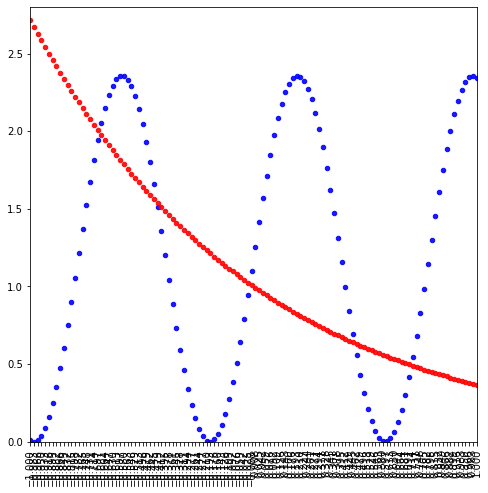

In [73]:
ticks = x
fig, ax = plt.subplots(1, 1,figsize=(8, 8))
ax.scatter(x, pdf1,alpha=0.9, s = 20, c = 'b')
ax.scatter(x,pdf2, alpha=0.9, s = 20, c = 'r')
plt.xticks(ticks, rotation='vertical' )
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2.8])

## The discrete transport plan $T$

The cost function is given by the squared distance $M$

In [74]:
M = ot.dist(x.reshape((nn, 1)), x.reshape((nn, 1)))
G0 = ot.emd(pdf1, pdf2, M)
T = G0.transpose()

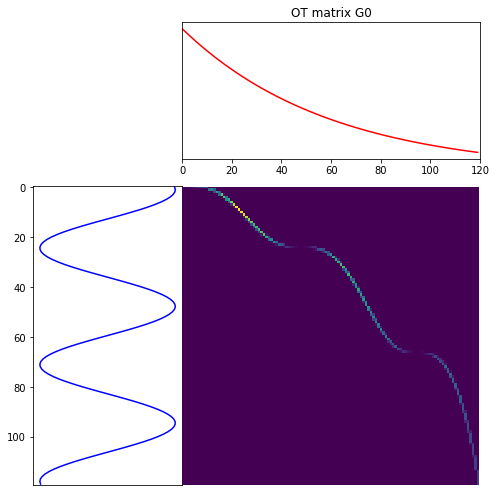

In [75]:
plt.figure( figsize=(7, 7))
ot.plot.plot1D_mat(pdf1, pdf2, T, 'OT matrix G0')

## Fake dynamics simulating the continuous transition between *pdf1* and *pdf2*  


In [76]:
tol = 1/(nn**4)
def lista(t):
    lista  = np.array([((1-t)*x[j] + t*x[i],  T[i,j],) \
          for i in range (nn) for j in range(nn) if  T[i,j]> tol])
    lista = lista[lista[:,0].argsort()]
    zl = [z[0] for z in lista]
    Tl = [z[1] for z in lista]
    return (zl, Tl)

(0.0, 3)

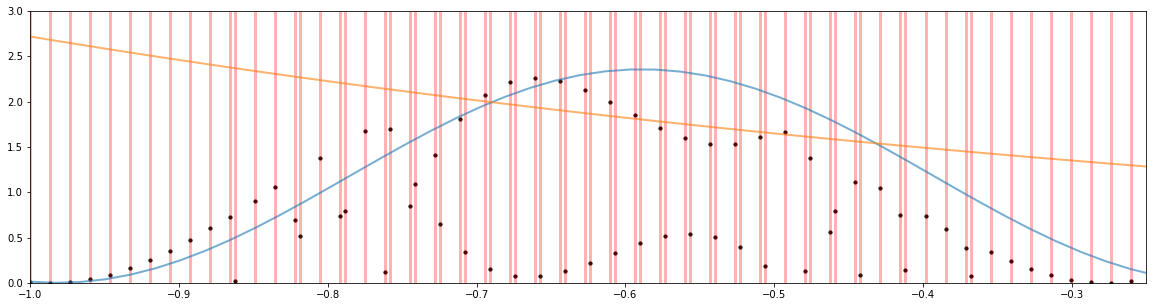

In [84]:
zl, Tl = lista(0.2)
fig, ax = plt.subplots(1, 1,figsize=(20, 5))
#for z in x:
   # ax.vlines(z,0,3, alpha=0.3, colors='b',linewidths=10)   
for z in zl:
    ax.vlines(z,0,3, alpha=0.3, colors='r', linewidths=3)    
ax.scatter( zl, Tl,alpha=1, s = 10 , c = 'k')
ax.plot(x, pdf1, lw=2, alpha=0.6)
ax.plot(x, pdf2,   lw = 2, alpha=0.6)
ax.set_xlim([-1, -0.25])
ax.set_ylim([0.0, 3])

# Clusters

In [86]:
def threshold(t):
    lst = lista(t)[0]
    dif = np.diff(lst)
    return np.sort([z for z in dif if z>t/(2*nn**4)])[0] 

In [87]:
threshold(0.2)

0.003361344537815114

In [88]:
def decant(t):
    lst = lista(t)[0]
    dif = np.diff(lst) 
    thrh = np.sort([z for z in dif if z>t/(2*nn**3)])[0] 
    return [n for n in range(len(dif)) if dif[n]< thrh +tol**2]

In [89]:
def clusters(t):
    F = decant(t)
    cls = []
    j = 0
    while j < len(F):
        cl = []
        m = 0
        while ((F[j]+ m) in F):
            cl.append(F[j]+ m)
            m = m+1
        cl.append(F[j]+m)
        cls.append(cl)
        j = j+m
    return cls

In [90]:
clusters_indexes  = [item for sublist in clusters(0.2) for item in sublist]
cluster_points = [zl[n] for n in flatten_clusters]
cluster_values = [Tl[n] for n in flatten_clusters]
main_points = [z for z in zl if z not in cluster_points]
main_values = [tl for tl in Tl if tl not in cluster_values]

(0.0, 3)

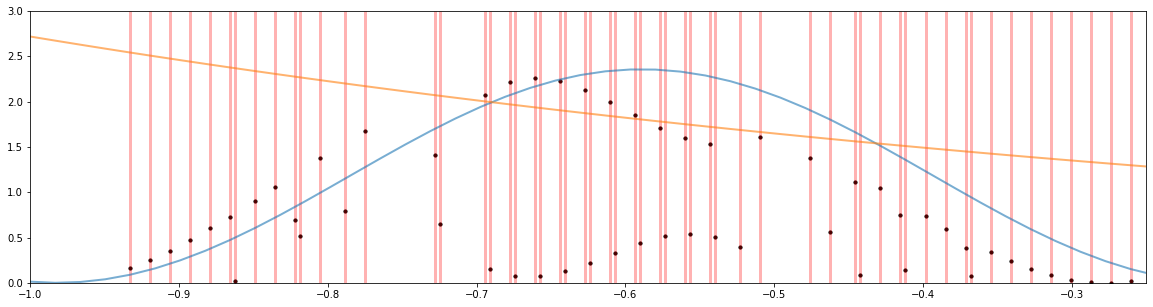

In [91]:
fig, ax = plt.subplots(1, 1,figsize=(20, 5))
#for z in x:
   # ax.vlines(z,0,3, alpha=0.3, colors='b',linewidths=10)   
for z in cluster_points:
    ax.vlines(z,0,3, alpha=0.3, colors='r', linewidths=3)    
ax.scatter( cluster_points, cluster_values,alpha=1, s = 10 , c = 'k')
ax.plot(x, pdf1, lw=2, alpha=0.6)
ax.plot(x, pdf2,   lw = 2, alpha=0.6)
ax.set_xlim([-1, -0.25])
ax.set_ylim([0.0, 3])

In [92]:
cluster_points[:10] 

[-0.9327731092436975,
 -0.919327731092437,
 -0.9058823529411766,
 -0.8924369747899161,
 -0.8789915966386554,
 -0.865546218487395,
 -0.8621848739495799,
 -0.8487394957983193,
 -0.8352941176470589,
 -0.8218487394957983]

In [69]:
cluster_points[:10] 

[-0.9191919191919193,
 -0.9030303030303031,
 -0.8868686868686868,
 -0.8707070707070708,
 -0.8545454545454545,
 -0.8505050505050505,
 -0.8343434343434345,
 -0.8181818181818182,
 -0.8020202020202021,
 -0.797979797979798]

In [ ]:
 
np.around(zl[:17],3)

In [ ]:
np.around(np.sort(dif),3)

In [ ]:
np.around(zl[:20],3)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20, 5))
#ax.scatter( z_intp[1:], weig_intp,alpha=1, s = 1 , c = 'k')
for z in zl:
    ax.vlines(z,0,0.01, alpha=0.2)
ax.scatter( zl[:-1], diff,alpha=1, s = 1 , c = 'k')
 
ax.set_xlim([-1,-0.9])
ax.set_ylim([0.0, 0.01])

In [ ]:
np.round(diff,2)

In [ ]:
z_intp = [x[0]]+[(1-t)*x[j]+ t*x[j+1] for j in range(0,nn-1)]
len(z_intp)

In [ ]:
def interpolation_weigh(i):
    return np.array([z[1] for z in lista if z_intp [i-1] <z[0]<= z_intp [i]]).sum() 

In [ ]:
weig_intp = [interpolation_weigh(i) for i in range(1, nn)]
len(weig_intp)

In [ ]:
np.sum(weig_intp)-np.sum(pdf2)

In [ ]:
np.round(x, 2)

In [ ]:
np.round(z_intp,2) 

In [ ]:
np.round(zl, 2)


In [ ]:
np.round(cl, 2)

In [ ]:
(2*t/nn, 2*(1-t)/nn,)

In [ ]:
np.histogram(diff, bins =  nn)

In [ ]:
mm = 20
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
ax.scatter( x[0:mm], zl[0:mm],alpha=1, s = 35, c = 'b')
ax.scatter( x[0:mm], x[0:mm],alpha=1, s = 35, c = 'r')
ax.scatter( x[0:mm], z_intp[0:mm],alpha=1, s = 35, c = 'k')
ax.set_xlim([-1, x[mm]])
ax.set_ylim([-1, x[mm]])

In [ ]:
np.histogram(zl, bins = 3*nn)

In [ ]:
len(zl)

In [ ]:
tol = 10**(-9)
lista  = np.array([((1-t)*x[i] + t*x[j],  G0[i,j], int(i), int(j)) \
          for i in range (nn) for j in range(nn) if  G0[i,j]> tol])
lista = lista[lista[:,0].argsort()]
zh = np.array([x[0]]+[(1-t)*x[i] + t*x[i+1] for i in range (nn-1) ])
ipm = [z[1] for z in lista]
ipv = [z[0] for z in lista]
ls = lista[0:10]
ls

In [ ]:
def mass_counter(k):
    return  np.sum(np.array([ z[1]  for z in lista if x[k]<z[0]<x[k+1]]) )

In [ ]:
 (mass_counter(0), mass_counter(1), mass_counter(2), mass_counter(3) )
 

In [ ]:
np.sum(mc0, axis = 0)

In [ ]:
mc1 = mass_counter(1)

In [ ]:
mass_counter(2)

In [ ]:
mass_interp = np.array([G0[0,0]] + [mass_counter(k) for k in range(nn-1)] )
len(mass_interp)

In [ ]:
np.sum(mass_interp)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
ax.scatter( zl, cl+cls,alpha=0.6, s = 20,)
ax.plot(x, pdf1, 'b-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, pdf2, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set_xlim([-1, 1])
ax.set_ylim([0.0, 0.002])
#ax.plot(x,(1-t)*pdf1+ t*pdf2, 'g-', lw=2, alpha=0.6, label='norm pdf')

In [ ]:
np.sum(weigh)

In [ ]:
k = 10
tol = 10**(-10)
np.sum([pdf1[j] for j in range(nn) if IpM[k,j] > tol] )- pdf2[k]

In [ ]:
z = np.sort(z_list)
datos = [z[j+1]-z[j] for j in range(len(z)-1)]
np.histogram(datos)

In [ ]:
datos

In [ ]:
Id = np.identity(nn)
t =0.05
R = ((1-t)/nn)*Id+ t*G0

In [ ]:
pdft = np.sum(R, axis = 0)

In [ ]:
plt.figure( figsize=(5, 5))
ot.plot.plot1D_mat(pdf1, pdft, R, 'OT matrix G0')

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(5, 5))
ax.plot(x, pdf1, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, pdft, 'b-', lw=5, alpha=0.6, label='norm pdf')
#plt.show()

In [ ]:
a, b  = norm.ppf(0.001,loc=0, scale=sdv2), norm.ppf(0.999,loc=0, scale=sdv2)
x = np.linspace(a, b, nn)
pdf1 = norm.pdf(x, loc=mu1, scale=sdv1) 
pdf2 = norm.pdf(x, loc=mu2, scale=sdv2) 
pdf1 /= np.sum(pdf1)
pdf2 /= np.sum(pdf2)

In [ ]:
M = ot.dist(x.reshape((nn, 1)), x.reshape((nn, 1)))

In [ ]:
G0 = ot.emd(pdf1, pdf2, M)

plt.figure( figsize=(5, 5))
ot.plot.plot1D_mat(pdf1, pdf2, G0, 'OT matrix G0')

In [ ]:
lista = [[i,j] for i in range(nn) for j in range(nn) if G0[i,j]>0.0001]
a = lista[3] 
np.sum([ G0[a[0], a[1]] for a in lista ] )

In [ ]:
lista

In [ ]:
 G0[3,1] -pdf2[1]

In [ ]:
W=ot.emd2(pdf1,pdf2,M)
np.sqrt(W)

In [ ]:
x = np.linalg.solve(G0, pdf1)


In [ ]:
pdf1

In [ ]:
np.sum(G0, axis = 1)